In [138]:
# !pip install bentoml
from tensorflow.python.keras.utils import np_utils
import bentoml
from bentoml import api, artifacts, env, BentoService
from bentoml.artifact import KerasModelArtifact
from bentoml.handlers import ImageHandler

In [62]:
import keras
import numpy as np
import tensorflow as tf
from os import path, listdir
import matplotlib.pyplot as plt

In [129]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.layers import Input,GlobalMaxPooling2D,Dense
from tensorflow.keras.applications import MobileNetV2, ResNet50, InceptionV3
from tensorflow.keras.models import Model

In [9]:
directory='training_set'


In [10]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [11]:
train_generator=datagen.flow_from_directory(
    directory=directory,
    target_size=(256, 256),
    color_mode="rgb",
    classes=None,
#     class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
#     save_to_dir=save_to,
#     save_prefix="",
#     save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
    class_mode="sparse"
)

Found 742 images belonging to 10 classes.


In [125]:
test_dir='test_set'
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory( 
    test_dir, 
    target_size=(256, 256), 
    batch_size=batch_size, 
    class_mode='binary')


Found 109 images belonging to 10 classes.


(1, 1089, 1636, 3)

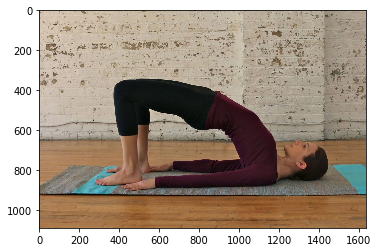

In [12]:
path='training_set/bridge'
img = load_img('training_set/bridge/File6.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
plt.imshow(img)
x.shape

In [ ]:
n_classes=10
batch_size=32
inputs = Input(shape=(256,256,3))
net = MobileNetV2(include_top=False, alpha=0.35, weights='imagenet', input_tensor=inputs, classes=n_classes)

net = GlobalMaxPooling2D()(net.output)

outputs = Dense(n_classes,activation='softmax')(net)

model = Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
model.fit_generator(train_generator,
    steps_per_epoch=200 // batch_size,
    validation_data=validation_generator,
        epochs=30)

D:\Yashika Sharma\anaconda3\envs\python\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 4 steps
Epoch 1/30
5/6 [========================>.....] - ETA: 5s - loss: 5.3487 - sparse_categorical_accuracy: 0.2239 

In [32]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 16) 64          Conv1[0][0]                      
____________________________________________________________________________________________

In [33]:
model.save_weights('bottleneck_fc_model.h5')

In [ ]:
# from keras.callbacks import ModelCheckpoint
# filepath = 'D:/downloads/best_weights.hdf5'
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=True, mode='auto',period=1)

In [96]:
generator= datagen.flow_from_directory(directory, batch_size=batch_size)
label_map = (generator.class_indices)
label_map


Found 742 images belonging to 10 classes.


{'bridge': 0,
 'childs': 1,
 'downwarddog': 2,
 'mountain': 3,
 'plank': 4,
 'seatedforwardbend': 5,
 'tree': 6,
 'trianglepose': 7,
 'warrior1': 8,
 'warrior2': 9}

In [52]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image and converts  into an object 
        that can be used as input to a trained model, returns an Numpy array.

        Arguments
        ---------
        image_path: string, path of the image.
    '''
    
    im = load_img(image_path
                   , target_size=(256,256))
    im =img_to_array(im)
    im = np.expand_dims(im, axis=0)
    
    return im

In [112]:
def get_key(val): 
    for key, value in label_map.items(): 
         if val == value: 
             return key 
    

def predict(image_path, model):
    ''' Predict the class (or classes) of an image using a trained deep learning model,
        returns the probabilities and classes of most likely (k) predicted classes.
        
        Arguments
        ---------
        image_path: string, path of the image.
        model: the pre-trained model.
    
    '''
    
 
    image = process_image(image_path)

    prediction = model.predict(image)
    
    return get_key(np.argmax(prediction))
    
    

In [127]:
predict('training_set/tree/File10.jpg',model)


'bridge'

In [116]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = y_hat[index]
    true_index = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
@env(pip_dependencies=['keras', 'tensorflow==1.14.0', 'Pillow', 'numpy'])
@artifacts([KerasModelArtifact('classifier')])
class KerasFashionMnistService(BentoService):
        
    @api(ImageHandler, pilmode='L')
    def predict(self, img):
        img = Image.fromarray(img).resize((28, 28))
        img /= 255.0
        img = np.array(img.getdata()).reshape((1,28,28,1))
        class_idx = self.artifacts.classifier.predict_classes(img)[0]
        return class_names[class_idx]